# Scatterplots and Correlation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')
print(fuel_econ.shape)
fuel_econ.head(6)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8
5,32209,Lexus,GS 350,2013,Midsize Cars,Rear-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.5,0,99,19.4325,24.1499,28.2234,38.5000,22.6002,393,6,6


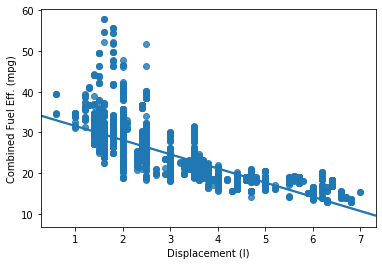

In [3]:
# plt.scatter(data = fuel_econ, x = 'displ', y = 'comb');
sb.regplot(data = fuel_econ, x = 'displ', y = 'comb');
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

## Overplotting, Transparency, and Jitter

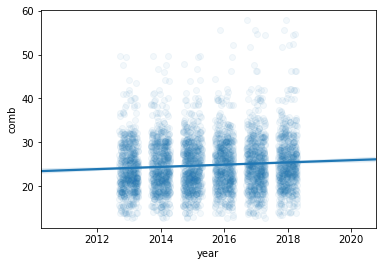

In [4]:
sb.regplot(data = fuel_econ, x = 'year', y = 'comb', x_jitter = 0.3,
           scatter_kws = {'alpha' : 1/20});

## Heat Maps

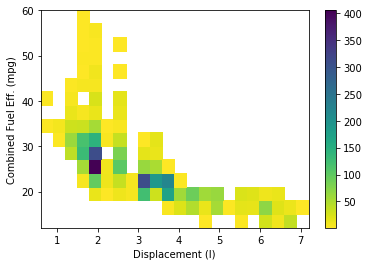

In [5]:
bins_x = np.arange(0.6, 7+0.3, 0.3)
bins_y = np.arange(12, 58+3, 3)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'comb', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [6]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


## Vioin Plots

In [7]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

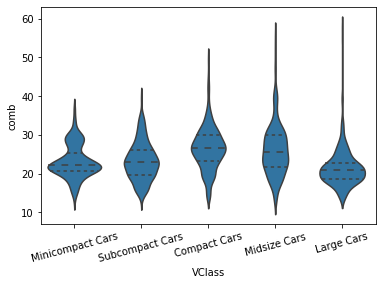

In [8]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color, inner = 'quartile');
plt.xticks(rotation = 15);

## Box Plots

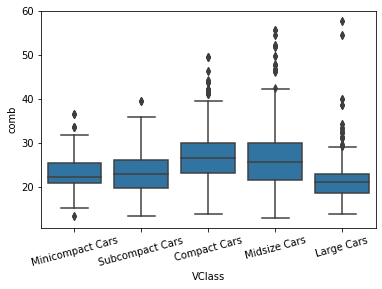

In [9]:
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'comb',
              color = base_color);
plt.xticks(rotation = 15);

## Clustered Bar Charts

In [14]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

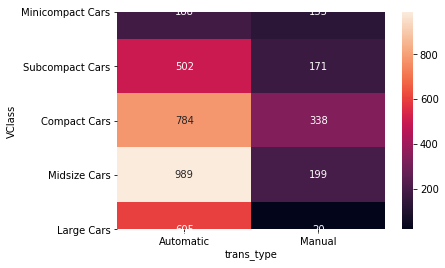

In [19]:
sb.heatmap(ct_counts, annot = True, fmt = 'd');

In [16]:
ct_counts = fuel_econ.groupby(['VClass', 'trans_type']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')

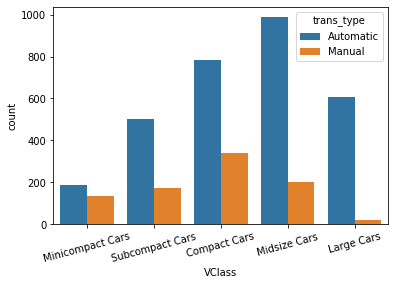

In [21]:
sb.countplot(data = fuel_econ, x = 'VClass', hue = 'trans_type')
plt.xticks(rotation = 15);

## Faceting

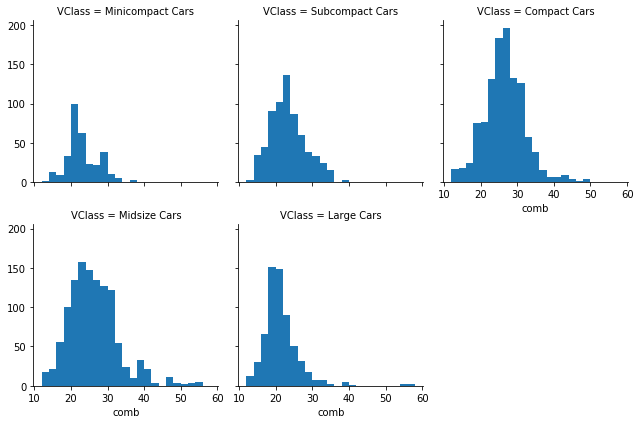

In [24]:
bins = np.arange(12, 58+2, 2)
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap = 3);
g.map(plt.hist, 'comb', bins = bins);

## Adaptation of Univariate Plots

Text(0, 0.5, 'Acg. Combined Fuel Eff. (mpg)')

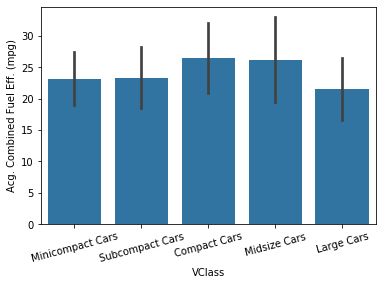

In [28]:
base_color = sb.color_palette()[0]
sb.barplot(data = fuel_econ, x = 'VClass', y = 'comb',
           color = base_color, ci = 'sd');
plt.xticks(rotation = 15);
plt.ylabel('Acg. Combined Fuel Eff. (mpg)')

Text(0, 0.5, 'Acg. Combined Fuel Eff. (mpg)')

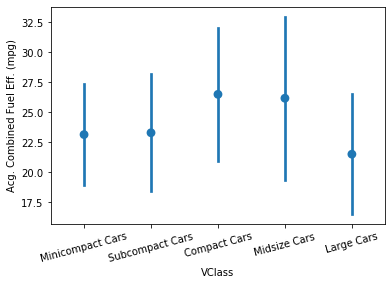

In [30]:
sb.pointplot(data = fuel_econ, x = 'VClass', y = 'comb',
             ci = 'sd', linestyles = "");
plt.xticks(rotation = 15);
plt.ylabel('Acg. Combined Fuel Eff. (mpg)')

## Line Plots

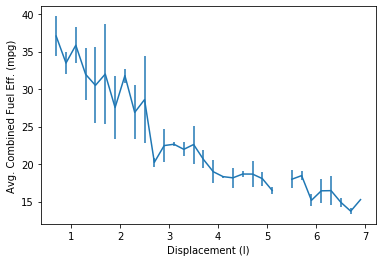

In [37]:
plt.errorbar(x = bins_c, y = comb_mean, yerr = comb_std);
plt.xlabel('Displacement (l)')
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');

In [36]:
bins_e = np.arange(0.6, 7+0.2, 0.2)
bins_c = bins_e[:-1] + 0.1

displ_binned = pd.cut(fuel_econ['displ'], bins_e, include_lowest = True)
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

## Quantitative vs. Qualitative Data

Quantitative data are used when a researcher is trying to quantify a problem, or address the "what" or "how many" aspects of a research question. It is data that can either be counted or compared on a numeric scale. For example, it could be the number of first year students at Macalester, or the ratings on a scale of 1-4 of the quality of food served at Cafe Mac. This data are usually gathered using instruments, such as a questionnaire which includes a ratings scale or a thermometer to collect weather data. Statistical analysis software, such as SPSS, is often used to analyze quantitative data.

Qualitative data describes qualities or characteristics. It is collected using questionnaires, interviews, or observation, and frequently appears in narrative form. For example, it could be notes taken during a focus group on the quality of the food at Cafe Mac, or responses from an open-ended questionnaire. Qualitative data may be difficult to precisely measure and analyze. The data may be in the form of descriptive words that can be examined for patterns or meaning, sometimes through the use of coding. Coding allows the researcher to categorize qualitative data to identify themes that correspond with the research questions and to perform quantitative analysis.